15:59:01.851 [BoBRobotics::Navigation::ImageDatabase::ImageDatabase@238] Using image database at ../../datasets/rc_car/Stanmer_park_dataset/2611/unwrapped_dataset1
15:59:01.856 [BoBRobotics::Navigation::ImageDatabase::ImageDatabase@238] Using image database at ../../datasets/rc_car/Stanmer_park_dataset/2611/unwrapped_dataset2
15:59:01.861 [BoBRobotics::Navigation::ImageDatabase::ImageDatabase@238] Using image database at ../../datasets/rc_car/Stanmer_park_dataset/2611/unwrapped_dataset3
Using cached result from '.bob_robotics_cache/1301833289.py_get_ridf_headings_7cfbcacb578a1811b772f677b99ec1ad50250319964bb370b19c766cf87cebb2.pkl'
get_ridf_headings() took 0.107527 s to run (without caching)


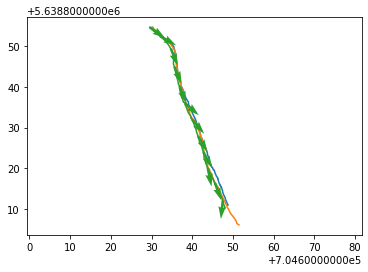

In [1]:
import sys
NAVBENCH_ROOT = '../..'
sys.path.append(NAVBENCH_ROOT)

import matplotlib.pyplot as plt
import navbench as nb
from navbench import imgproc as ip
import numpy as np
import os


IM_SIZE = (90, 25)
PREPROC = (ip.resize(*IM_SIZE), ip.histeq)
SNAP_STEP = 25

DB_ROOT = os.path.join(NAVBENCH_ROOT, 'datasets/rc_car/Stanmer_park_dataset/2611')
dbs = [nb.Database('%s/unwrapped_dataset%d' % (DB_ROOT, i)) for i in range(1, 4)]

_, ax = plt.subplots()
colours = []
for db in dbs:
    line = ax.plot(db.x, db.y)
    colours.append(line[0].get_color())
ax.axis('equal')

entries = [db.read_image_entries(preprocess=PREPROC, to_float=False) for db in dbs]
snapshots = entries[0].image.to_list() + entries[1].image.to_list()

for db, test_entries, colour in zip(dbs[2:], entries[2:], colours[2:]):
    test_entries = test_entries.iloc[::SNAP_STEP]

    headings = nb.get_ridf_headings(test_entries, snapshots)
    nb.anglequiver(ax, test_entries.x, test_entries.y, headings, color=colour, zorder=10)

Starting get_trained_network()...
15:59:02.429 [BoBRobotics::Navigation::InfoMax<FloatType>::generateInitialWeights@129] Seed for weights is: 42
get_trained_network() took 84.199 s to run (without caching)
Saving result to cache '.bob_robotics_cache/246038954.py_get_trained_network_049ddb9fb4d7981da179ea69c16990a744b046bd94833edb8bccb26dd2e3a2bc.pkl'
Starting get_infomax_headings()...
get_infomax_headings() took 0.289146 s to run (without caching)
Saving result to cache '.bob_robotics_cache/246038954.py_get_infomax_headings_8b5abcefe23763d6ece765d01c02a5ffa28ccfac2c2822bb20dfc69ae67f5f27.pkl'


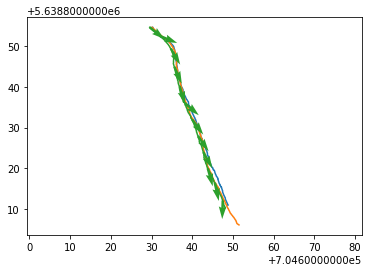

In [2]:
training_images = snapshots

INFOMAX_SEED = 42
INFOMAX_LEARNING_RATE = nb.InfoMax.DEFAULT_LEARNING_RATE
ann = nb.get_trained_network(training_images, INFOMAX_SEED, learning_rate=INFOMAX_LEARNING_RATE)

_, ax = plt.subplots()
colours = []
for db in dbs:
    line = ax.plot(db.x, db.y)
    colours.append(line[0].get_color())
ax.axis('equal')

for db, test_entries, colour in zip([dbs[2]], [entries[2]], [colours[2]]):
    test_entries = test_entries.iloc[::SNAP_STEP]

    headings = nb.get_infomax_headings(ann, test_entries)
    u = np.cos(headings)
    v = np.sin(headings)
    ax.quiver(db.x[::SNAP_STEP], db.y[::SNAP_STEP], u, v, color=colour, zorder=10);